# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## This notebook was last tested with IPython notebook 4.1.0 using Python 2.7
### (If you have trouble running this notebook, please check version compatibility)

## First, do the necessary set-up (run the code block below, first)

In [5]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from ipywidgets import interact, interact_manual, fixed, ToggleButtons, SelectMultiple

from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c
from implementation import Implementation as imp, PipelineConfig
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Mid)

available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, Bands.Mid5C,
                   Bands.Sur1)

# The High Priority Science Objective list below includes the HPSOs that were originally intended for 
# The Survey telescope. These have since been reassigned to Mid.
available_hpsos = [HPSOs.hpso_max_Low_c, HPSOs.hpso_max_Low_s, HPSOs.hpso_max_Mid_c, HPSOs.hpso_max_Mid_s, 
                   HPSOs.hpso_max_band5_Mid_c, HPSOs.hpso_max_band5_Mid_s, 
                   HPSOs.hpso01c, HPSOs.hpso01s, HPSOs.hpso02A, HPSOs.hpso02B, 
                   #HPSOs.hpso14, 
                   HPSOs.hpso14c, HPSOs.hpso14s, 
                   HPSOs.hpso22, HPSOs.hpso37a, HPSOs.hpso37b, HPSOs.hpso38a, HPSOs.hpso38b, 
                   HPSOs.hpso13c, HPSOs.hpso13s, HPSOs.hpso15c, HPSOs.hpso15s, 
                   HPSOs.hpso27, HPSOs.hpso33, HPSOs.hpso37c]

available_hpsos.sort()

available_pipelines     = (Pipelines.DPrepA, Pipelines.DPrepC, Pipelines.Fast_Img)
available_pipelines_all = Pipelines.all

verbose_display     = ['Overview', 'Details', 'Debug']
def toggles(opts, *args): return ToggleButtons(options=opts, *args)

## Using default values, we can compare telescopes side-by-side

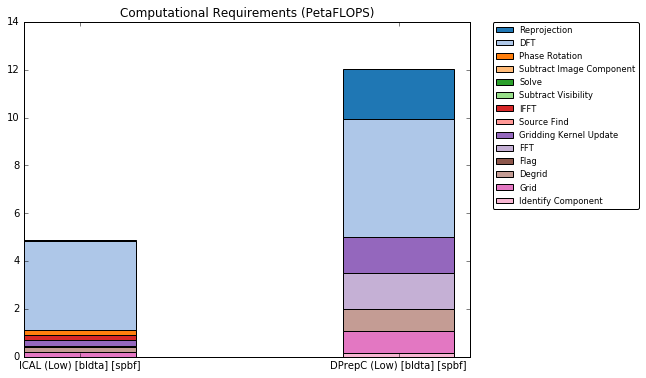

In [6]:
interact_manual(iapi.compare_telescopes_default,
                telescope_1=toggles(available_teles),
                telescope_2=toggles(available_teles),
                band_1=toggles(available_bands),
                band_2=toggles(available_bands),
                pipeline_1=toggles(available_pipelines_all),
                pipeline_2=toggles(available_pipelines_all),
                verbosity=toggles(verbose_display))

## Using default values, can compute results for the High Priority Science Objectives

HPSO Number,14c
Telescope,SKA1_Mid_rebaselined
Pipeline,DPrepA
Max Baseline,150000 m
Max # of channels,65536
Observation time,6 hr 0 min 0 sec
Texp (not used in calc),2000 hr 0 min 0 sec
Tpoint (not used in calc),10 hr 0 min 0 sec


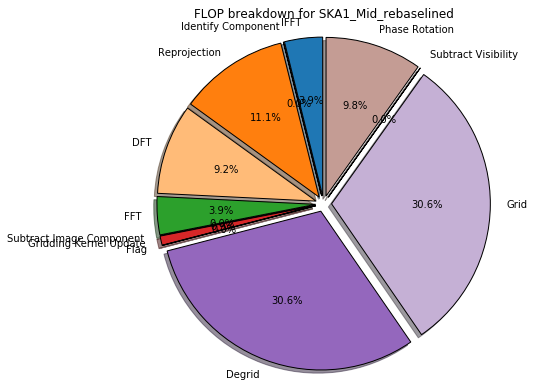

In [6]:
interact_manual(iapi.evaluate_hpso_optimized, hpso_key=toggles(available_hpsos), verbosity=toggles(verbose_display));

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [ ]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10000,200000), Nf_max = (1,2**17,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         telescope=toggles(available_teles), band=toggles(available_bands),
         pipeline=toggles(available_pipelines_all), verbosity=toggles(verbose_display));

### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

In [ ]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10000,200000), Nf_max = (1,256000,1), telescope=toggles(available_teles), 
                band=toggles(available_bands), pipeline=toggles(available_pipelines_all), verbosity=toggles(verbose_display));

## illustrating 1D "parameter sweep" + visualization functionality.

Starting sweep of parameter Nsource, evaluating expression Rflop over range (100, 10000) in 10 steps (i.e. 11 data points)
> 0.0% done: Evaluating Rflop for Nsource = 100
> 9.1% done: Evaluating Rflop for Nsource = 1090
> 18.2% done: Evaluating Rflop for Nsource = 2080
> 27.3% done: Evaluating Rflop for Nsource = 3070
> 36.4% done: Evaluating Rflop for Nsource = 4060
> 45.5% done: Evaluating Rflop for Nsource = 5050
> 54.5% done: Evaluating Rflop for Nsource = 6040
> 63.6% done: Evaluating Rflop for Nsource = 7030
> 72.7% done: Evaluating Rflop for Nsource = 8020
> 81.8% done: Evaluating Rflop for Nsource = 9010
> 90.9% done: Evaluating Rflop for Nsource = 10000
done with parameter sweep!


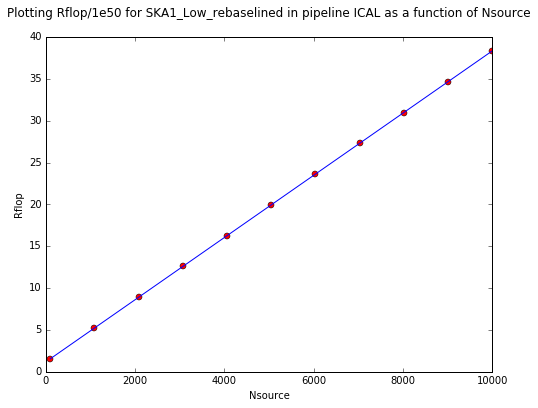

100.0 , 1.5522166987
1090.0 , 5.23050335769
2080.0 , 8.90879001669
3070.0 , 12.5870766757
4060.0 , 16.2653633347
5050.0 , 19.9436499937
6040.0 , 23.6219366527
7030.0 , 27.3002233117
8020.0 , 30.9785099707
9010.0 , 34.6567966296
10000.0 , 38.3350832886


In [9]:
from IPython.display import display, HTML

expression = 'Rflop'
parameter = 'Nsource'
param_val_min =100
param_val_max = 10000
number_steps = 10
telescope = Telescopes.SKA1_Low
pipeline = Pipelines.ICAL
band=Bands.Low

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
cfg = PipelineConfig(telescope=telescope, pipeline=pipeline, band=band)
(param_values, results) = iapi.eval_param_sweep_1d(cfg, expression=expression, parameter=parameter, param_val_min=param_val_min,
                                                   param_val_max=param_val_max, number_steps=number_steps, verbose=False)
header = 'Plotting %s/1e50 for %s in pipeline %s as a function of %s' % (expression, telescope, pipeline, parameter)
iapi.plot_line_datapoints(header, param_values, np.array(results)/c.peta, xlabel=parameter, ylabel=expression)

for i in range(len(param_values)):
               print param_values[i], ",", (results[i])/c.peta

## illustrating 2D "parameter sweep" + visualization functionality.

In [ ]:
from IPython.display import display, HTML

telescope = Telescopes.SKA1_Mid
band = Bands.Mid1
pipeline = Pipelines.Fast_Img
expression = 'Rflop'
parameters = ('Bmax', 'Tobs')
parameter_ranges = ((30000,150000),(0.15,2.0))
number_steps = 4
verbose = False

display(HTML('<font color="blue">Computing the result -- this may take several (tens of) seconds.</font>'))
cfg = PipelineConfig(telescope=telescope, pipeline=pipeline, band=band)
(p1_values, p2_values, results) = iapi.eval_param_sweep_2d(cfg, expression=expression, parameters=parameters, 
                                                           params_ranges=parameter_ranges, number_steps=number_steps, 
                                                           verbose=verbose)


iapi.plot_2D_surface('%s/1e15 rate vs #Channels & Max Baseline' % expression,
                     p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], contours=np.array((0.5, 1.0)))
iapi.plot_3D_surface('%s/1e15 rate vs #Channels & Max Baseline' % expression,
                     p1_values, p2_values, results/1e15, xlabel=parameters[0], 
                     ylabel=parameters[1], zlabel=expression, contours=np.array((0.5, 1.0)))

## Calculation results can be exported as CSV

In [ ]:
interact_manual(iapi.write_csv_hpsos,
                filename="current_hpsos.csv",
                hpsos=SelectMultiple(options=available_hpsos, value=available_hpsos))

In [10]:
interact_manual(iapi.write_csv_pipelines,
                filename="current_pipelines.csv",
                telescopes=SelectMultiple(options=available_teles, value=available_teles),
                bands=SelectMultiple(options=available_bands, value=available_bands),
                pipelines=SelectMultiple(options=available_pipelines_all, value=available_pipelines_all))

Ingest not imaging - no need to optimise Tsnap and Nfacet


RCAL not imaging - no need to optimise Tsnap and Nfacet


DPrepD not imaging - no need to optimise Tsnap and Nfacet


Ingest not imaging - no need to optimise Tsnap and Nfacet


RCAL not imaging - no need to optimise Tsnap and Nfacet


DPrepD not imaging - no need to optimise Tsnap and Nfacet


Ingest not imaging - no need to optimise Tsnap and Nfacet


RCAL not imaging - no need to optimise Tsnap and Nfacet


DPrepD not imaging - no need to optimise Tsnap and Nfacet


Ingest not imaging - no need to optimise Tsnap and Nfacet


RCAL not imaging - no need to optimise Tsnap and Nfacet


DPrepD not imaging - no need to optimise Tsnap and Nfacet


Ingest not imaging - no need to optimise Tsnap and Nfacet


RCAL not imaging - no need to optimise Tsnap and Nfacet


DPrepD not imaging - no need to optimise Tsnap and Nfacet


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
Ingest not imaging - no need to optimise Tsnap and Nfacet


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
RCAL not imaging - no need to optimise Tsnap and Nfacet


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5
DPrepD not imaging - no need to optimise Tsnap and Nfacet


using 2x2.5GHz subbands from 4.6-9.6GHz for band 5


In [11]:
interact_manual(iapi.compare_csv,
                result_file="current_pipelines.csv",
                ref_file="reference_pipelines.csv")

IOError: [Errno 2] No such file or directory: u'reference_pipelines.csv'